In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#Data on Sample ONLY used for Factor Determination
DataOnSample = pd.read_excel("Champo.xlsx", sheet_name = 'Data on Sample ONLY' )

In [3]:
DataOnSample.head()

CustomerCode CountryName  USA   UK  Italy  Belgium  Romania  Australia  \
0           CC       INDIA  0.0  0.0    0.0      0.0      0.0        0.0   
1          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
2          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
3          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
4          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   

   India  QtyRequired  ... Knotted  Jacquard  Handloom  Other  ShapeName  REC  \
0    1.0            1  ...       0         0         0      0        REC    1   
1    0.0            1  ...       0         0         0      0        REC    1   
2    0.0            2  ...       0         0         0      0        REC    1   
3    0.0            1  ...       0         0         0      0        REC    1   
4    0.0            1  ...       0         0         0      0        REC    1   

   Round  Square  AreaFt Order Conversion  
0      0       0    80.0                1  
1      0       0    80.0                1  
2      0       0    80.0                1  
3      0       0    80.0                1  
4      0       0    80.0                1  

[5 rows x 25 columns]

In [4]:
DataOnSample.shape

(5820, 25)

In [5]:
DataOnSample.columns

Index(['CustomerCode', 'CountryName', 'USA', 'UK', 'Italy', 'Belgium',
       'Romania', 'Australia', 'India', 'QtyRequired', 'ITEM_NAME',
       'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven', 'Knotted',
       'Jacquard', 'Handloom', 'Other', 'ShapeName', 'REC', 'Round', 'Square',
       'AreaFt', 'Order Conversion'],
      dtype='object')

In [6]:
DataOnSample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerCode      5820 non-null   object 
 1   CountryName       5820 non-null   object 
 2   USA               5781 non-null   float64
 3   UK                5781 non-null   float64
 4   Italy             5781 non-null   float64
 5   Belgium           5781 non-null   float64
 6   Romania           5781 non-null   float64
 7   Australia         5781 non-null   float64
 8   India             5781 non-null   float64
 9   QtyRequired       5820 non-null   int64  
 10  ITEM_NAME         5820 non-null   object 
 11  Hand Tufted       5820 non-null   int64  
 12  Durry             5820 non-null   int64  
 13  Double Back       5820 non-null   int64  
 14  Hand Woven        5820 non-null   int64  
 15  Knotted           5820 non-null   int64  
 16  Jacquard          5820 non-null   int64  


In [7]:
DataOnSample.describe()

USA           UK        Italy      Belgium      Romania  \
count  5781.000000  5781.000000  5781.000000  5781.000000  5781.000000   
mean      0.249092     0.035115     0.007784     0.022833     0.003460   
std       0.432525     0.184086     0.087891     0.149385     0.058722   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Australia        India  QtyRequired  Hand Tufted        Durry  ...  \
count  5781.000000  5781.000000  5820.000000  5820.000000  5820.000000  ...   
mean      0.001730     0.681716     1.974914     0.416667     0.268557  ...   
std       0.041559     0.465851     5.683137     0.493049     0.443247  ...   
min       0.000000     0.000000     1.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     1.000000     0.000000     0.000000  ...   
50%       0.000000     1.000000     1.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
max       1.000000     1.000000   200.000000     1.000000     1.000000  ...   

        Hand Woven      Knotted     Jacquard     Handloom        Other  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000   
mean      0.121134     0.037285     0.014433     0.017698     0.029038   
std       0.326311     0.189476     0.119278     0.131861     0.167927   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               REC        Round       Square       AreaFt  Order Conversion  
count  5820.000000  5820.000000  5820.000000  5820.000000       5820.000000  
mean      0.986426     0.009794     0.003780    21.555815          0.200859  
std       0.115724     0.098486     0.061371    21.548281          0.400677  
min       0.000000     0.000000     0.000000     0.666700          0.000000  
25%       1.000000     0.000000     0.000000     6.000000          0.000000  
50%       1.000000     0.000000     0.000000    11.000000          0.000000  
75%       1.000000     0.000000     0.000000    39.812500          0.000000  
max       1.000000     1.000000     1.000000   480.000000          1.000000  

[8 rows x 21 columns]

In [8]:
DataOnSample['Order Conversion'].value_counts()

0    4651
1    1169
Name: Order Conversion, dtype: int64

In [9]:
DataOnSample.duplicated().sum()

4741

In [10]:
DataOnSample.duplicated()

0       False
1       False
2       False
3        True
4        True
        ...  
5815     True
5816     True
5817     True
5818    False
5819     True
Length: 5820, dtype: bool

In [11]:
DataOnSample.drop_duplicates()

CustomerCode CountryName  USA   UK  Italy  Belgium  Romania  Australia  \
0              CC       INDIA  0.0  0.0    0.0      0.0      0.0        0.0   
1             M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
2             M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
5              CC       INDIA  0.0  0.0    0.0      0.0      0.0        0.0   
7             M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
...           ...         ...  ...  ...    ...      ...      ...        ...   
5810          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
5811          H-2         USA  1.0  0.0    0.0      0.0      0.0        0.0   
5812          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
5813          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
5818          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   

      India  QtyRequired  ... Knotted  Jacquard  Handloom  Other  ShapeName  \
0       1.0            1  ...       0         0         0      0        REC   
1       0.0            1  ...       0         0         0      0        REC   
2       0.0            2  ...       0         0         0      0        REC   
5       1.0            1  ...       0         0         0      0        REC   
7       0.0            1  ...       0         0         0      0        REC   
...     ...          ...  ...     ...       ...       ...    ...        ...   
5810    0.0            1  ...       1         0         0      0        REC   
5811    0.0           11  ...       0         1         0      0        REC   
5812    0.0            2  ...       0         0         0      0        REC   
5813    0.0            1  ...       0         0         0      0        REC   
5818    0.0            1  ...       0         0         0      0        REC   

      REC  Round  Square  AreaFt Order Conversion  
0       1      0       0    80.0                1  
1       1      0       0    80.0                1  
2       1      0       0    80.0                1  
5       1      0       0    80.0                1  
7       1      0       0    40.0                1  
...   ...    ...     ...     ...              ...  
5810    1      0       0   108.0                1  
5811    1      0       0   117.0                1  
5812    1      0       0   140.0                1  
5813    1      0       0   224.0                1  
5818    1      0       0   480.0                1  

[1079 rows x 25 columns]

In [12]:
DataOnSample.dtypes

CustomerCode         object
CountryName          object
USA                 float64
UK                  float64
Italy               float64
Belgium             float64
Romania             float64
Australia           float64
India               float64
QtyRequired           int64
ITEM_NAME            object
Hand Tufted           int64
Durry                 int64
Double Back           int64
Hand Woven            int64
Knotted               int64
Jacquard              int64
Handloom              int64
Other                 int64
ShapeName            object
REC                   int64
Round                 int64
Square                int64
AreaFt              float64
Order Conversion      int64
dtype: object

In [13]:
DataOnSample.isna().sum()

CustomerCode         0
CountryName          0
USA                 39
UK                  39
Italy               39
Belgium             39
Romania             39
Australia           39
India               39
QtyRequired          0
ITEM_NAME            0
Hand Tufted          0
Durry                0
Double Back          0
Hand Woven           0
Knotted              0
Jacquard             0
Handloom             0
Other                0
ShapeName            0
REC                  0
Round                0
Square               0
AreaFt               0
Order Conversion     0
dtype: int64

In [14]:
DataOnSample.replace(np.nan,'0',inplace = True)

In [15]:
DataOnSample.isna().sum()

CustomerCode        0
CountryName         0
USA                 0
UK                  0
Italy               0
Belgium             0
Romania             0
Australia           0
India               0
QtyRequired         0
ITEM_NAME           0
Hand Tufted         0
Durry               0
Double Back         0
Hand Woven          0
Knotted             0
Jacquard            0
Handloom            0
Other               0
ShapeName           0
REC                 0
Round               0
Square              0
AreaFt              0
Order Conversion    0
dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'unique'

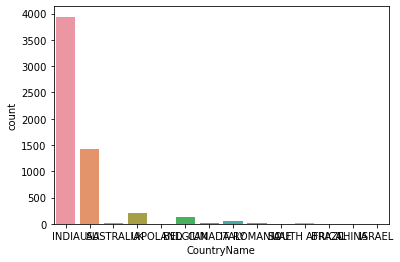

In [16]:
sns.countplot(DataOnSample['CountryName']).unique()

<ipython-input-17-23fc48537b29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DataOnSample.corr())


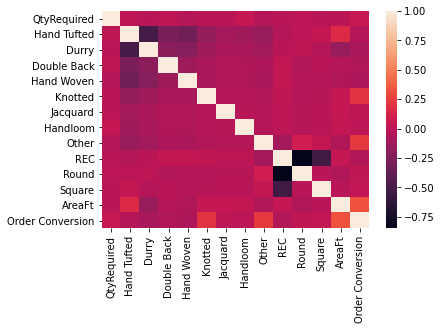

In [17]:
sns.heatmap(DataOnSample.corr())

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:755: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:755: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


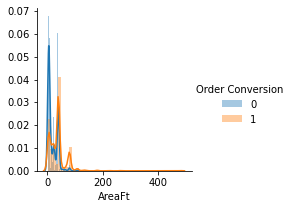

In [18]:
sns.FacetGrid(DataOnSample, hue = "Order Conversion").map(sns.distplot, "AreaFt").add_legend()
plt.show()

In [19]:
DataOnSample

CustomerCode CountryName  USA   UK Italy Belgium Romania Australia India  \
0              CC       INDIA  0.0  0.0   0.0     0.0     0.0       0.0   1.0   
1             M-1         USA  1.0  0.0   0.0     0.0     0.0       0.0   0.0   
2             M-1         USA  1.0  0.0   0.0     0.0     0.0       0.0   0.0   
3             M-1         USA  1.0  0.0   0.0     0.0     0.0       0.0   0.0   
4             M-1         USA  1.0  0.0   0.0     0.0     0.0       0.0   0.0   
...           ...         ...  ...  ...   ...     ...     ...       ...   ...   
5815          T-2       ITALY  0.0  0.0   1.0     0.0     0.0       0.0   0.0   
5816          T-2       ITALY  0.0  0.0   1.0     0.0     0.0       0.0   0.0   
5817          T-2       ITALY  0.0  0.0   1.0     0.0     0.0       0.0   0.0   
5818          M-1         USA  1.0  0.0   0.0     0.0     0.0       0.0   0.0   
5819           CC       INDIA  0.0  0.0   0.0     0.0     0.0       0.0   1.0   

      QtyRequired  ... Knotted  Jacquard  Handloom  Other  ShapeName  REC  \
0               1  ...       0         0         0      0        REC    1   
1               1  ...       0         0         0      0        REC    1   
2               2  ...       0         0         0      0        REC    1   
3               1  ...       0         0         0      0        REC    1   
4               1  ...       0         0         0      0        REC    1   
...           ...  ...     ...       ...       ...    ...        ...  ...   
5815            1  ...       0         0         0      0        REC    1   
5816            1  ...       0         0         0      0        REC    1   
5817            1  ...       0         0         0      0        REC    1   
5818            1  ...       0         0         0      0        REC    1   
5819            1  ...       0         0         0      0        REC    1   

      Round  Square    AreaFt Order Conversion  
0         0       0   80.0000                1  
1         0       0   80.0000                1  
2         0       0   80.0000                1  
3         0       0   80.0000                1  
4         0       0   80.0000                1  
...     ...     ...       ...              ...  
5815      0       0    2.7778                0  
5816      0       0    2.7778                0  
5817      0       0    2.7778                0  
5818      0       0  480.0000                1  
5819      0       0   39.8125                0  

[5820 rows x 25 columns]

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the feature columns and the target column
feature_cols = DataOnSample.drop('Order Conversion', axis = 1)
target_col = DataOnSample['Order Conversion']

In [21]:
feature_cols.columns

Index(['CustomerCode', 'CountryName', 'USA', 'UK', 'Italy', 'Belgium',
       'Romania', 'Australia', 'India', 'QtyRequired', 'ITEM_NAME',
       'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven', 'Knotted',
       'Jacquard', 'Handloom', 'Other', 'ShapeName', 'REC', 'Round', 'Square',
       'AreaFt'],
      dtype='object')

In [22]:
feature_cols.get('CustomerCode')

0        CC
1       M-1
2       M-1
3       M-1
4       M-1
       ... 
5815    T-2
5816    T-2
5817    T-2
5818    M-1
5819     CC
Name: CustomerCode, Length: 5820, dtype: object

In [23]:
# Convert categorical variables into numerical variables using one-hot encoding
data = pd.get_dummies(feature_cols)

In [24]:
data.columns

Index(['QtyRequired', 'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven',
       'Knotted', 'Jacquard', 'Handloom', 'Other', 'REC', 'Round', 'Square',
       'AreaFt', 'CustomerCode_A-11', 'CustomerCode_A-9', 'CustomerCode_B-2',
       'CustomerCode_B-3', 'CustomerCode_C-1', 'CustomerCode_C-2',
       'CustomerCode_CC', 'CustomerCode_CTS', 'CustomerCode_E-2',
       'CustomerCode_F-1', 'CustomerCode_F-2', 'CustomerCode_F-6',
       'CustomerCode_H-2', 'CustomerCode_I-2', 'CustomerCode_JL',
       'CustomerCode_K-2', 'CustomerCode_K-3', 'CustomerCode_L-3',
       'CustomerCode_L-4', 'CustomerCode_L-5', 'CustomerCode_M-1',
       'CustomerCode_M-2', 'CustomerCode_N-1', 'CustomerCode_P-4',
       'CustomerCode_P-5', 'CustomerCode_PC', 'CustomerCode_PD',
       'CustomerCode_RC', 'CustomerCode_S-3', 'CustomerCode_T-2',
       'CustomerCode_T-4', 'CustomerCode_T-5', 'CustomerCode_TGT',
       'CustomerCode_V-1', 'CountryName_AUSTRALIA', 'CountryName_BELGIUM',
       'CountryName_BRAZIL', '

In [25]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(data,target_col, test_size=0.2, random_state=42)

In [26]:
X_train

QtyRequired  Hand Tufted  Durry  Double Back  Hand Woven  Knotted  \
350             2            1      0            0           0        0   
2886            2            1      0            0           0        0   
2377            1            1      0            0           0        0   
457             2            1      0            0           0        0   
2998           15            1      0            0           0        0   
...           ...          ...    ...          ...         ...      ...   
3772            1            0      1            0           0        0   
5191            1            0      1            0           0        0   
5226            3            1      0            0           0        0   
5390            1            1      0            0           0        0   
860             1            1      0            0           0        0   

      Jacquard  Handloom  Other  REC  ...  ITEM_NAME_HANDLOOM  \
350          0         0      0    1  ...                   0   
2886         0         0      0    1  ...                   0   
2377         0         0      0    1  ...                   0   
457          0         0      0    1  ...                   0   
2998         0         0      0    1  ...                   0   
...        ...       ...    ...  ...  ...                 ...   
3772         0         0      0    1  ...                   0   
5191         0         0      0    1  ...                   0   
5226         0         0      0    1  ...                   0   
5390         0         0      0    1  ...                   0   
860          0         0      0    1  ...                   0   

      ITEM_NAME_HANDWOVEN  ITEM_NAME_INDO-TIBBETAN  ITEM_NAME_JACQUARD  \
350                     0                        0                   0   
2886                    0                        0                   0   
2377                    0                        0                   0   
457                     0                        0                   0   
2998                    0                        0                   0   
...                   ...                      ...                 ...   
3772                    0                        0                   0   
5191                    0                        0                   0   
5226                    0                        0                   0   
5390                    0                        0                   0   
860                     0                        0                   0   

      ITEM_NAME_KNOTTED  ITEM_NAME_POWER LOOM JACQUARD  \
350                   0                              0   
2886                  0                              0   
2377                  0                              0   
457                   0                              0   
2998                  0                              0   
...                 ...                            ...   
3772                  0                              0   
5191                  0                              0   
5226                  0                              0   
5390                  0                              0   
860                   0                              0   

      ITEM_NAME_TABLE TUFTED  ShapeName_REC  ShapeName_ROUND  ShapeName_SQUARE  
350                        0              1                0                 0  
2886                       0              1                0                 0  
2377                       0              1                0                 0  
457                        0              1                0                 0  
2998                       0              1                0                 0  
...                      ...            ...              ...               ...  
3772                       0              1                0                 0  
5191                       0              1                0                 0  
5226     

In [27]:
X_train.isna().sum()

QtyRequired                      0
Hand Tufted                      0
Durry                            0
Double Back                      0
Hand Woven                       0
                                ..
ITEM_NAME_POWER LOOM JACQUARD    0
ITEM_NAME_TABLE TUFTED           0
ShapeName_REC                    0
ShapeName_ROUND                  0
ShapeName_SQUARE                 0
Length: 96, dtype: int64

In [28]:
# Train a decision tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict on the test dataset
y_pred = tree.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9201030927835051


In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
cm = confusion_matrix(y_test,y_pred)

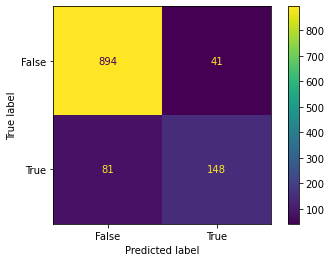

In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       935
           1       0.78      0.65      0.71       229

    accuracy                           0.90      1164
   macro avg       0.85      0.80      0.82      1164
weighted avg       0.89      0.90      0.89      1164



In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,40), dpi = 500) # adjust the figure size as per your requirement
plot_tree(tree,max_depth = 4, filled=True, fontsize = 25)
plt.show()
#plt.savefig('DT.png')

# plot_tree(clf, filled=True)
# plt.show()

In [30]:
importances = tree.feature_importances_
print(importances)

[5.66671316e-02 1.66624322e-02 1.70282872e-02 1.97081960e-03
 7.92182244e-03 6.21563609e-02 4.49456069e-04 2.97690095e-03
 1.02738529e-01 1.70807829e-03 0.00000000e+00 0.00000000e+00
 3.44787342e-01 0.00000000e+00 2.52646504e-03 0.00000000e+00
 0.00000000e+00 1.05836405e-03 1.48277463e-03 4.98223056e-03
 0.00000000e+00 0.00000000e+00 3.51072051e-04 2.37087619e-04
 0.00000000e+00 4.36861266e-03 1.53590261e-03 2.81922712e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.78320249e-04 1.35169762e-02 9.90959233e-04 2.80586888e-04
 1.62437395e-03 7.34987770e-03 1.65172145e-03 1.05456835e-01
 1.74396181e-03 7.61593217e-04 2.66723572e-04 0.00000000e+00
 0.00000000e+00 1.67868394e-03 7.26636243e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13425386e-02 0.00000000e+00
 2.23754351e-02 3.35056325e-03 0.00000000e+00 0.00000000e+00
 1.58982841e-03 0.00000000e+00 0.00000000e+00 2.96792166e-04
 7.53848707e-02 2.62229857e-02 1.23618361e-02 0.00000000e+00
 1.55588750e-03 9.137207

In [31]:
feature_names = X_train.columns
#indices = importances.argsort()[::-1]
#for i in indices:
    #print(feature_names[i], importances[i])

# Create a DataFrame with two columns: Attribute & Score 
feature_effect = pd.DataFrame({'Attribute': feature_names, 'Score': importances}).sort_values(by=['Score'],ascending= False)
# Print the DataFrame
feature_effect

Attribute     Score
12               AreaFt  0.344787
39      CustomerCode_PD  0.105457
8                 Other  0.102739
60      CountryName_USA  0.075385
5               Knotted  0.062156
..                  ...       ...
67            Italy_0.0  0.000000
68            Italy_1.0  0.000000
69              Italy_0  0.000000
71          Belgium_1.0  0.000000
48  CountryName_BELGIUM  0.000000

[96 rows x 2 columns]

In [40]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8539518900343642
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       935
           1       0.74      0.39      0.51       229

    accuracy                           0.85      1164
   macro avg       0.81      0.68      0.71      1164
weighted avg       0.84      0.85      0.84      1164



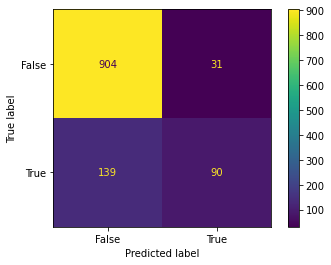

In [41]:
cm2 = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])

cm_display.plot()
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
# Train a logistic regression model
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8951890034364262


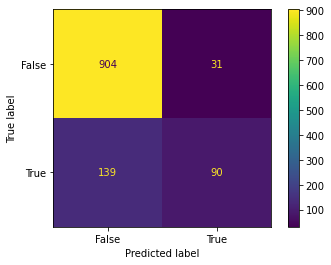

In [42]:
cm3 = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = [False, True])

cm_display.plot()
plt.show()